In [ ]:
# !python --version

In [ ]:
# !pip install pandas
# !pip install bs4

### 2024년 1학기 Python 기초입문 - v 1.0


[colaboratory로 실행](https://drive.google.com/file/d/1qfJQZuRe202JiQTTU6mo2QUtU3upP5C-/view?usp=sharing)

# 파이썬 데이터 분석

## 1. 시계열 분석(Time-Series analysis)에 대한 기초

### 시계열 자료란?
 - 횡단적 자료(cross-sectional data) - 횡단적 연구 (일반적 선형 회귀분석)
     - 특정한 조사시점에서 연구대상의 속성을 수집한 자료.
     - 그 시점에 나타난 여러 요인의 상호관계를 찾아낼 대 많이 이용
     - 개념이나 상호작용이 연구기간(일정 시점으로 보아도 보아도 무방한) 변화가 없는 상태
 - 종단적 자료(logitudinal data) - panel data, time-series data
     - 정기적(주기적)으로 동일한 데이터를 수집
     - 축적되는 데이터로 데이터의 변화를 파악
     - "일정 시간의 주기에 따라 수집된 정보 기록"
     
### 시계열 분석의 목적
 - 예측 (forecasting)
 - 영향 요인 이해

### 계열의 분해
 - 추세(trend), 계절성(seasonality), 주기성(cycle), 백색잡음(white noise)

### 회귀적 분석을 위한 자기상관
 - 자기상관(autocorrelation)은 시계열의 시차값 (lagged values) 사이의 선형 관계
 - 측정 시차 정보에서 자기상관 계수를 계산 :: ACF, PACF plot으로 파악하기도함.

### 정상성(stationarity)
 - 데이터의 자기상관 관계에서 단위근 존재하지 않는다.
 - 분석하는 데이터의 기간 내에 정보의 변화가 안정적이다.

### 차분(differencing)
 - 데이터의 정상성을 확보하기 위한 데이터에 대한 처리
 - 연이은 관측값들의 차이를 계산

### ARIMA (AutoRegressive Intergrated Moving Average: 이동평균을 누적한 자기회귀)
 - 통계적 시계열 모델
 - AR 모델(autoregressive model) 자귀회귀모델
 - MA 모델(moving average model) 이동평균모델

## 2. ARIMA 실습
### 실습용 데이터 다운로드
 - 네이버 금시세 다운로드
     - https://finance.naver.com/marketindex/
     - https://finance.naver.com/marketindex/goldDetail.naver

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np              #데이터를 행열 또는 array 형태로 다루는 라이브러리
import pandas as pd             #데이터를 Dataframe으로 다루는 라이브러리
import requests                 #네트워크 접근 라이브러리
from bs4 import BeautifulSoup   #웹사이트 접근하는 라이브러리
import matplotlib.pyplot as plt #데이터를 그래프 plot으로 보여주는 라이브러리
import seaborn as sns

In [ ]:
# 네이버 금시세 페이지
# https://finance.naver.com/marketindex/goldDailyQuote.nhn?&page=1

url = 'https://finance.naver.com/marketindex/goldDailyQuote.nhn?'
df = pd.DataFrame()
for page in range(1, 423):
    pg_url = ('{url}&page={page}'.format(url=url, page=page)).lstrip()
    pg = pd.read_html(pg_url,header=1)[0]
    df = pd.concat([df,pg])


In [ ]:
print(df.shape)
df.head(15)
# df.to_excel('Gold_price.xlsx')

(4220, 9)


,날짜,매매기준율,전일대비,사실 때,파실 때,입금 시,해지 시,기준 국제 금 시세,기준 원달러 환율
0,2023.11.24,83837.68,416.72,88029.56,79645.80,84676.05,82999.31,1994.57,1307.5
1,2023.11.23,83420.96,384.05,87592.00,79249.92,84255.16,82586.76,1993.04,1302.0
2,2023.11.22,83805.01,837.76,87995.26,79614.76,84643.06,82966.96,1999.91,1303.5
3,2023.11.21,82967.25,1188.27,87115.61,78818.89,83796.92,82137.58,2000.64,1290.0
4,2023.11.20,81778.98,847.87,85867.92,77690.04,82596.76,80961.20,1965.89,1294.0
5,2023.11.17,82626.85,508.84,86758.19,78495.51,83453.11,81800.59,1982.44,1296.5
6,2023.11.16,82118.01,91.36,86223.91,78012.11,82939.19,81296.83,1974.04,1294.0
7,2023.11.15,82209.37,473.37,86319.83,78098.91,83031.46,81387.28,1963.34,1302.5
8,2023.11.14,82682.74,270.92,86816.87,78548.61,83509.56,81855.92,1963.34,1310.0
9,2023.11.13,82411.82,97.03,86532.41,78291.23,83235.93,81587.71,1934.76,1325.0


In [ ]:
data = pd.DataFrame()
data['date'] = pd.to_datetime(df['날짜'][::-1])
data['price_index'] = df['매매기준율'][::-1]
data.set_index(data['date'])
data.head()

,date,price_index
9,2006-11-22,18855.11
8,2006-11-23,18834.48
7,2006-11-24,18960.28
6,2006-11-27,19174.44
5,2006-11-28,19175.34


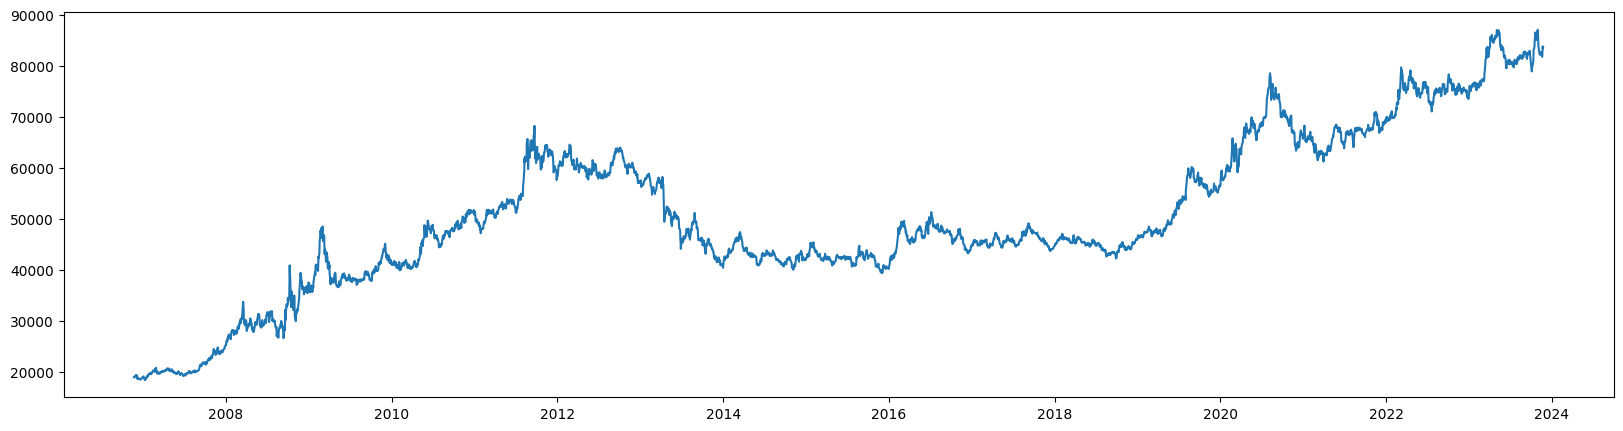

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(data['date'], data['price_index'])
plt.show()

## 3. KRX 종목으로 주가종목 데이터 가져오기

In [ ]:

target = '삼성전자'

# 종목 이름을 입력하면 종목에 해당하는 코드를 불러와
# 네이버 금융(http://finance.naver.com)에 넣어줌

code_krx = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌
code_krx.종목코드 = code_krx.종목코드.map('{:06d}'.format)
# 우리가 필요한 것은 회사명과 종목코드이기 때문에 필요없는 column들은 제외해준다.
code_krx = code_krx[['회사명', '종목코드']]
# code_krx
target_code = code_krx[code_krx['회사명']==target]
target_code

,회사명,종목코드
2026,삼성전자,005930


In [ ]:
# 종목코드로 네이버에서 종목 주소 생성 확인
def get_url(code): #(item_name, code_df):
    url = 'https://finance.naver.com/item/sise_day.naver?code='+'{code}'.format(code=code).lstrip()
    return url
code = target_code['종목코드'].iloc[0]
url = get_url(code)
url

'https://finance.naver.com/item/sise_day.naver?code=005930'

In [ ]:

# 위에서 찾은 네이버 타겟종목 페이지에서 마지막 페이지 크기 확인
url_page = url + '&page=1'
headers = {'User-agent':'Mozilla/5.0'}
html = requests.get(url_page, headers=headers).text
soup = BeautifulSoup(html,"html.parser")
tags = soup.find_all('a')
# print(tags[11]["href"])
last_page = tags[11]["href"]
last_page = last_page.split('=')[2]
last_page
# print(f"target_code :회사명 == [{target_code['회사명'].iloc[0]}] 종목코드 == [{target_code['종목코드'].iloc[0]}] 마지막 페이지 == [{last_page}]")

'688'

In [ ]:
last_page = 50 # 임시 50 페이지 까지만

# 일 데이터를 담을 df_code라는 DataFrame 정의
df_code = pd.DataFrame()
url.lstrip()
for page in range(1,int(last_page)+1):
    # pg_url = ('{url}&page={page}'.format(url=url, page=page)).lstrip()
    # pg = pd.read_html(pg_url,encoding='euc-kr',header=1)[0]
    # df_code = pd.concat([df_code,pg])
    req = requests.get(f'{url}&page={page}',headers=headers)
    df_code = pd.concat([df_code,pd.read_html(req.text,encoding='euc-kr')[0]],ignore_index=True)

# df.dropna()를 이용해 결측값 있는 행 제거
df_code = df_code.dropna()
df_code.reset_index(drop=True, inplace=True)

# 상위 15개 데이터 확인하기
df_code.head(15)

,날짜,종가,전일비,시가,고가,저가,거래량
0,2023.11.24,71700.0,700.0,72400.0,72600.0,71700.0,6394446.0
1,2023.11.23,72400.0,400.0,73000.0,73200.0,72200.0,6775614.0
2,2023.11.22,72800.0,0.0,72200.0,73000.0,71900.0,11105143.0
3,2023.11.21,72800.0,100.0,73100.0,73400.0,72700.0,9712881.0
4,2023.11.20,72700.0,200.0,72100.0,73000.0,72100.0,10610157.0
5,2023.11.17,72500.0,300.0,72300.0,73000.0,72300.0,11494644.0
6,2023.11.16,72800.0,600.0,72500.0,73000.0,72300.0,15860451.0
7,2023.11.15,72200.0,1400.0,71600.0,72200.0,71500.0,20148677.0
8,2023.11.14,70800.0,400.0,71000.0,71100.0,70600.0,9567984.0
9,2023.11.13,70400.0,100.0,71300.0,71300.0,70300.0,9246919.0


In [ ]:
# 한글로 된 컬럼명을 영어로 바꿔줌
stock_data = df_code.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'})
# 데이터의 타입을 int형으로 바꿔줌
stock_data[['close', 'diff', 'open', 'high', 'low', 'volume']] = stock_data[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(float)
# 컬럼명 'date'의 타입을 date로 바꿔줌
stock_data['date'] = pd.to_datetime(stock_data['date'])
# 일자(date)를 기준으로  정렬
stock_data = stock_data.sort_values(by=['date'],ascending = True)
# 상위 5개 데이터 확인
print(stock_data.shape)
stock_data.reset_index(drop=True, inplace=True)
stock_data.head(15)

(500, 7)


,date,close,diff,open,high,low,volume
0,2021-11-17,70700.0,600.0,71300.0,71600.0,70600.0,11027606.0
1,2021-11-18,70200.0,500.0,70700.0,71000.0,70200.0,10144957.0
2,2021-11-19,71200.0,1000.0,70400.0,71400.0,70100.0,11954728.0
3,2021-11-22,74900.0,3700.0,73300.0,75200.0,73000.0,27506623.0
4,2021-11-23,75300.0,400.0,76000.0,76000.0,74500.0,22029195.0
5,2021-11-24,74800.0,500.0,76000.0,76200.0,74100.0,15652305.0
6,2021-11-25,73700.0,1100.0,75100.0,75100.0,73600.0,12559258.0
7,2021-11-26,72300.0,1400.0,73500.0,74100.0,72000.0,13002242.0
8,2021-11-29,72300.0,0.0,71700.0,73000.0,71400.0,16682559.0
9,2021-11-30,71300.0,1000.0,73200.0,73900.0,70500.0,30364841.0


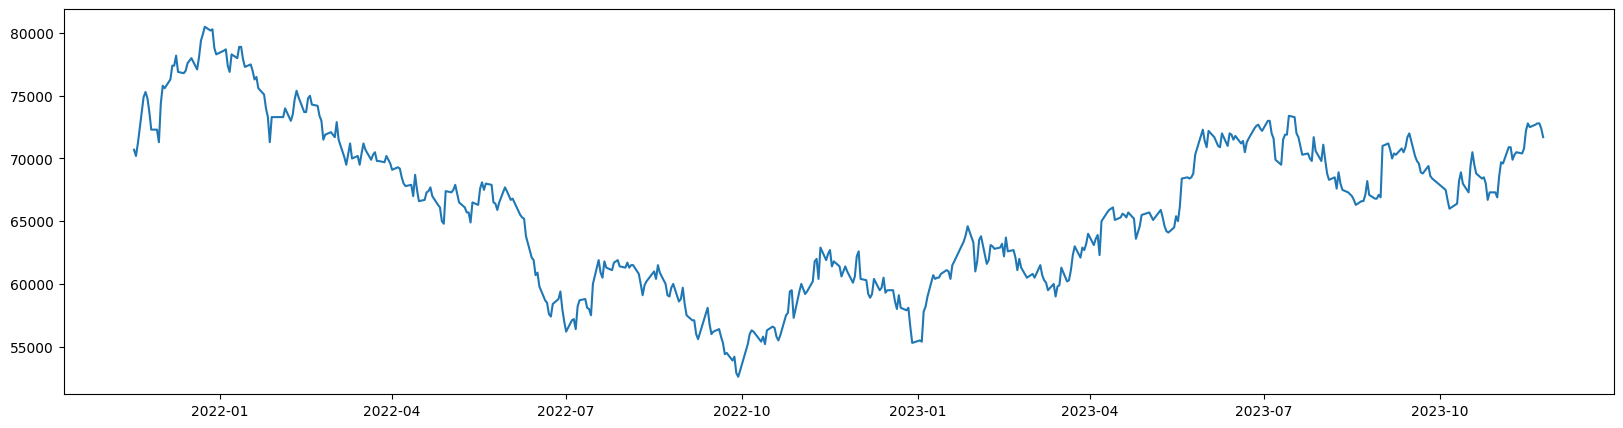

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(stock_data['date'], stock_data['close'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

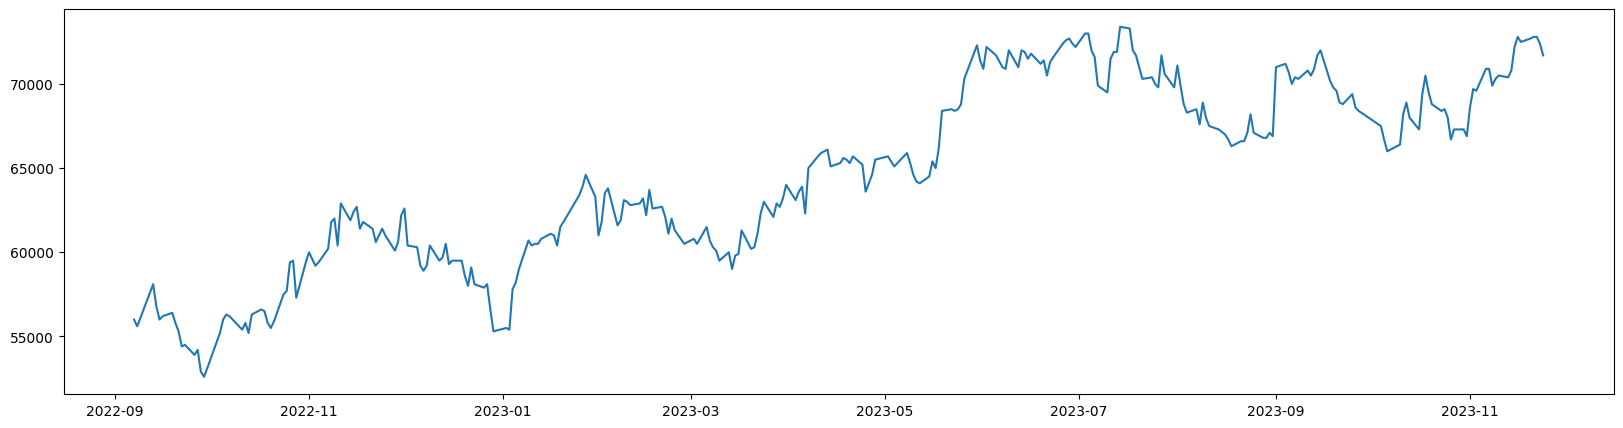

In [ ]:
slice_data = stock_data.iloc[-300:,:] # 특정 기간을 어림으로 분리
slice_data.reset_index(drop=True, inplace=True)
plt.figure(figsize=(20,5))
plt.plot(slice_data['date'],slice_data['close'])
plt.show

## 4. 시계열 분해

In [ ]:
# data = data
data = slice_data

<function matplotlib.pyplot.show(close=None, block=None)>

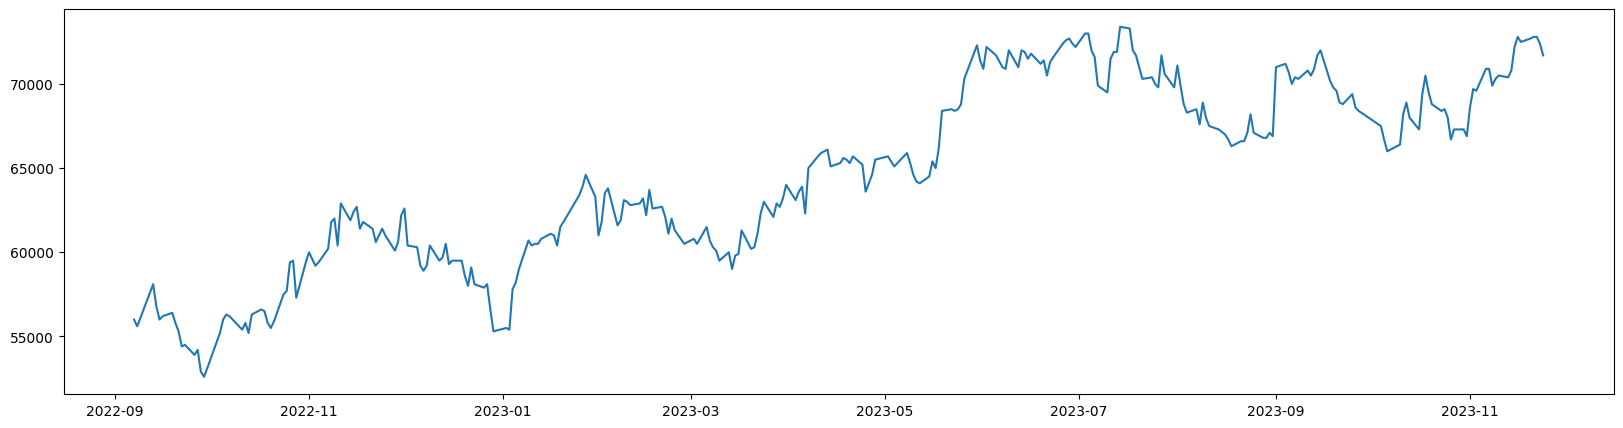

In [ ]:
ts = data.set_index(data['date'],drop=True)
ts.pop('date')
plt.figure(figsize=(20,5))
plt.plot(ts['close'])
plt.show

<Figure size 640x480 with 0 Axes>

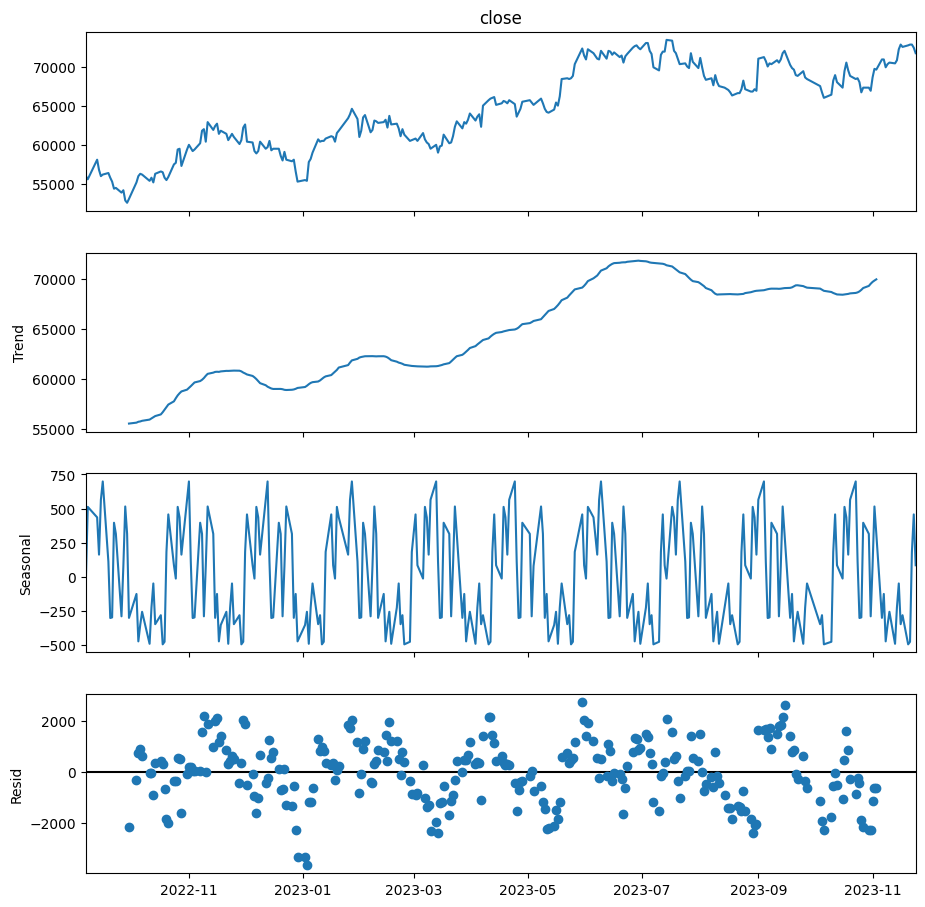

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts['close'], model="additive", period=30, two_sided=True, extrapolate_trend=0)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,10)
plt.show()

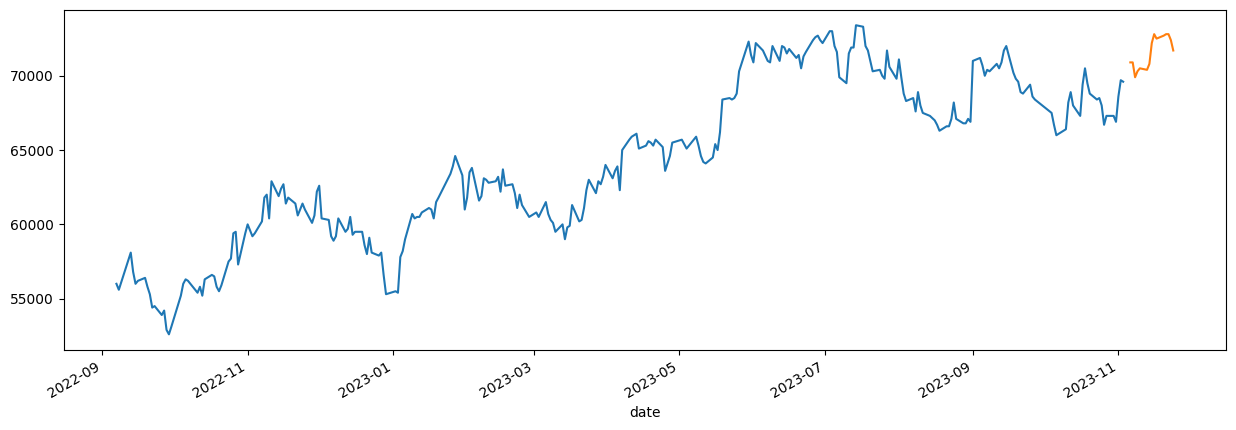

In [ ]:
train = ts['close'].iloc[:-int(len(ts['close'])*0.05)]
test=ts['close'].iloc[-int(len(ts['close'])*0.05):]
fig = plt.figure()
train.plot()
test.plot()
fig.set_size_inches(15,5)
plt.show()


In [ ]:
print(f"test 길이 :{len(test)}")
print(f"train 길이 :{len(train)}")

test 길이 :15
train 길이 :285


In [ ]:
train

date
2022-09-07    56000.0
2022-09-08    55600.0
2022-09-13    58100.0
2022-09-14    56800.0
2022-09-15    56000.0
               ...   
2023-10-30    67300.0
2023-10-31    66900.0
2023-11-01    68600.0
2023-11-02    69700.0
2023-11-03    69600.0
Name: close, Length: 285, dtype: float64

## 5. 정상성 테스트

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def adf_test(timeseries):
    ## perform augmented dickey fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic','p-value','# of lag','# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    return (dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"] )

    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)


In [ ]:
result_1 = adf_test(train)
print(result_1)
print("\n")
result_2 = kpss_test(train)
print(result_2)

Results of Augmented Dickey-Fuller test:
test statistic           -1.319538
p-value                   0.620187
# of lag                  2.000000
# of observations       282.000000
Critical Value (1%)      -3.453754
Critical Value (5%)      -2.871844
Critical Value (10%)     -2.572261
dtype: float64


Results of KPSS Test:
Test Statistic            2.232541
p-value                   0.010000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


## 6. ACF, PACF 확인

<function matplotlib.pyplot.show(close=None, block=None)>

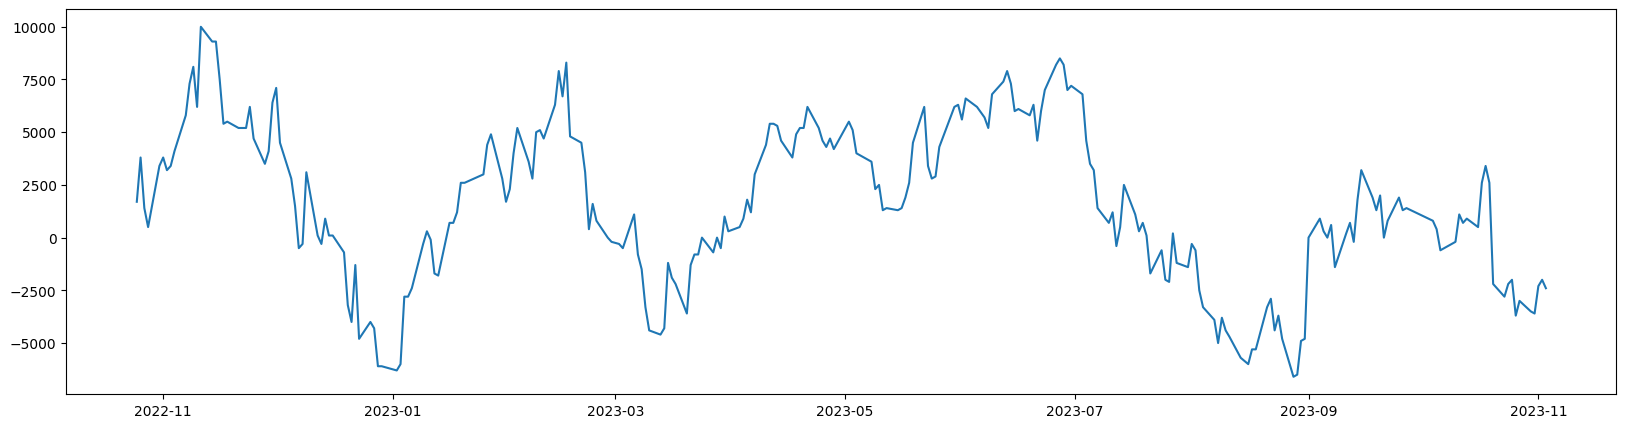

In [ ]:
train_d = train.diff(30).dropna()
# train_d = train.diff().diff().dropna()
# train_d = np.log(train).dropna()
plt.figure(figsize=(20,5))
plt.plot(train_d)
plt.show

In [ ]:
train_d

date
2022-10-25    1700.0
2022-10-26    3800.0
2022-10-27    1400.0
2022-10-28     500.0
2022-10-31    3400.0
               ...  
2023-10-30   -3500.0
2023-10-31   -3600.0
2023-11-01   -2300.0
2023-11-02   -2000.0
2023-11-03   -2400.0
Name: close, Length: 255, dtype: float64

In [ ]:
result_1 = adf_test(train_d)
print(result_1)
print("\n")
result_2 = kpss_test(train_d)
print(result_2)

Results of Augmented Dickey-Fuller test:
test statistic           -3.709319
p-value                   0.003984
# of lag                 13.000000
# of observations       241.000000
Critical Value (1%)      -3.457779
Critical Value (5%)      -2.873609
Critical Value (10%)     -2.573202
dtype: float64


Results of KPSS Test:
Test Statistic            0.297338
p-value                   0.100000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


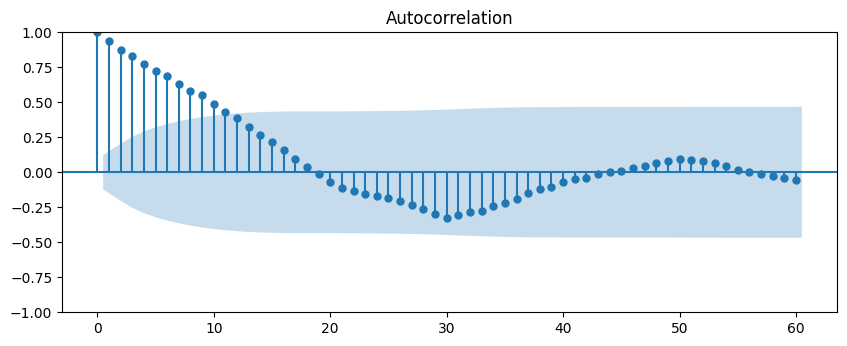

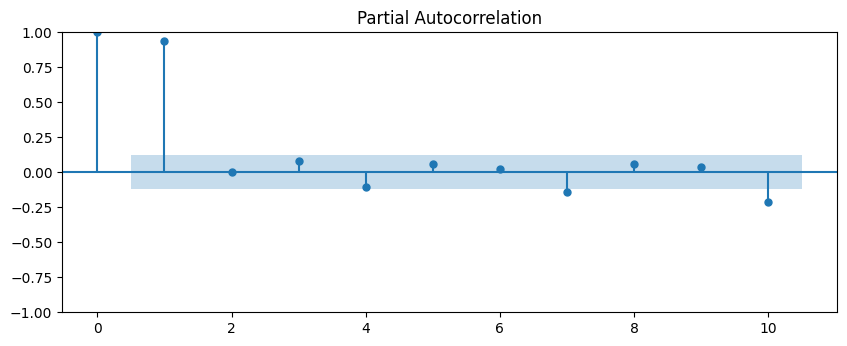

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_d,lags=60, ax=ax1)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_d, lags=10, ax=ax1, method='ywm')

## 7. ARIMA Model

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from tqdm import tqdm

### Grid Search  : 최적의 파라메터 값을 찾기 위한 검색 방법

In [ ]:
p = range(0,20)
d = range(0,2)
q = range(0,3)

pdq = list(itertools.product(p,d,q))

aic = []
params = []

with tqdm(total = len(pdq)) as pg:
    for i in pdq:
        pg.update(1)
        try:
            model = SARIMAX(train, order=(i))
            model_fit = model.fit()
            aic.append(round(model_fit.aic,2))
            params.append((i))
        except:
            continue

100%|██████████| 120/120 [03:21<00:00,  1.68s/it]


In [ ]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt = ARIMA(train_d, order = optimal[0][0])
model_opt_fit = model_opt.fit()
print(model_opt_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  255
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -2189.777
Date:                Fri, 24 Nov 2023   AIC                           4395.553
Time:                        10:47:25   BIC                           4423.883
Sample:                             0   HQIC                          4406.949
                                - 255                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1513.3333   1361.567      1.111      0.266   -1155.290    4181.956
ar.L1          0.9479      0.069     13.680      0.000       0.812       1.084
ar.L2         -0.0968      0.096     -1.004      0.3

In [ ]:
model = ARIMA(train, order=optimal[0][0])
model_fit = model.fit()
forecast = model_fit.forecast(steps=15)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  285
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -2349.267
Date:                Fri, 24 Nov 2023   AIC                           4714.535
Time:                        10:47:55   BIC                           4743.755
Sample:                             0   HQIC                          4726.248
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.423e+04   3710.501     17.310      0.000     5.7e+04    7.15e+04
ar.L1          0.9418      0.062     15.070      0.000       0.819       1.064
ar.L2         -0.1081      0.086     -1.257      0.2

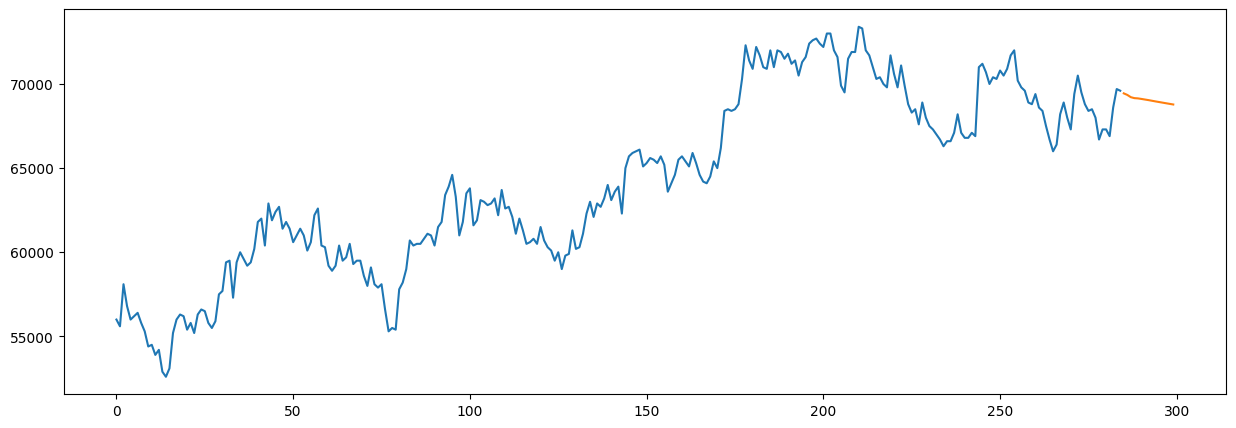

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train.values)
plt.plot(forecast)

In [ ]:
p = range(4,7)
d = range(0,2)
q = range(0,3)
m = 30
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1], x[2], m) for x in list(itertools.product(p,d,q))]

aic = []
params = []

with tqdm(total = len(pdq) * len(seasonal_pdq)) as pg:
    for i in pdq:
        for j in seasonal_pdq:
            pg.update(1)
            try:
                model = SARIMAX(train, order=(i), season_order = (j))
                model_fit = model.fit()
                aic.append(round(model_fit.aic,2))
                params.append((i,j))
            except:
                continue

100%|██████████| 324/324 [04:08<00:00,  1.30it/s]


In [ ]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt = SARIMAX(train_d, order = optimal[0][0][0], seasonal_order = optimal[0][0][1])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              close   No. Observations:                  255
Model:             SARIMAX(6, 0, 0)x(4, 0, 0, 30)   Log Likelihood               -2136.364
Date:                            Fri, 24 Nov 2023   AIC                           4294.728
Time:                                    08:25:46   BIC                           4333.682
Sample:                                         0   HQIC                          4310.397
                                            - 255                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9218      0.069     13.270      0.000       0.786       1.058
ar.L2         -0.0260      0.093     -0.279      0.780      -0.209       0.157
ar.L3          0.0706      0.098      0.721      0.471      -0.121       0.262
ar.L4         -0.0741      0.093     -0.799      0.424      -0.256       0.108
ar.L5          0.0666      0.095      0.703      0.482      -0.119       0.252
ar.L6          0.0267      0.069      0.389      0.697      -0.108       0.161
ar.S.L30      -0.8172      0.078    -10.451      0.000      -0.970      -0.664
ar.S.L60      -0.5945      0.118     -5.028      0.000      -0.826      -0.363
ar.S.L90      -0.3418      0.128     -2.667      0.008      -0.593      -0.091
ar.S.L120     -0.2208      0.099     -2.221      0.026      -0.416      -0.026
sigma2      9.894e+05   8.72e+04     11.345      0.000    8.18e+05    1.16e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                16.84
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.54
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt = SARIMAX(train, order = optimal[0][0][0], seasonal_order = optimal[0][0][1])
model_opt_fit = model_opt.fit()
forecast_s = model_opt_fit.forecast(steps=15)
print(model_opt_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                  285
Model:             SARIMAX(6, 0, 0)x(4, 0, 0, 30)   Log Likelihood               -2351.369
Date:                            Fri, 24 Nov 2023   AIC                           4724.738
Time:                                    08:31:37   BIC                           4764.916
Sample:                                         0   HQIC                          4740.845
                                            - 285                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9436      0.068     13.976      0.000       0.811       1.076
ar.L2         -0.1090      0.094   

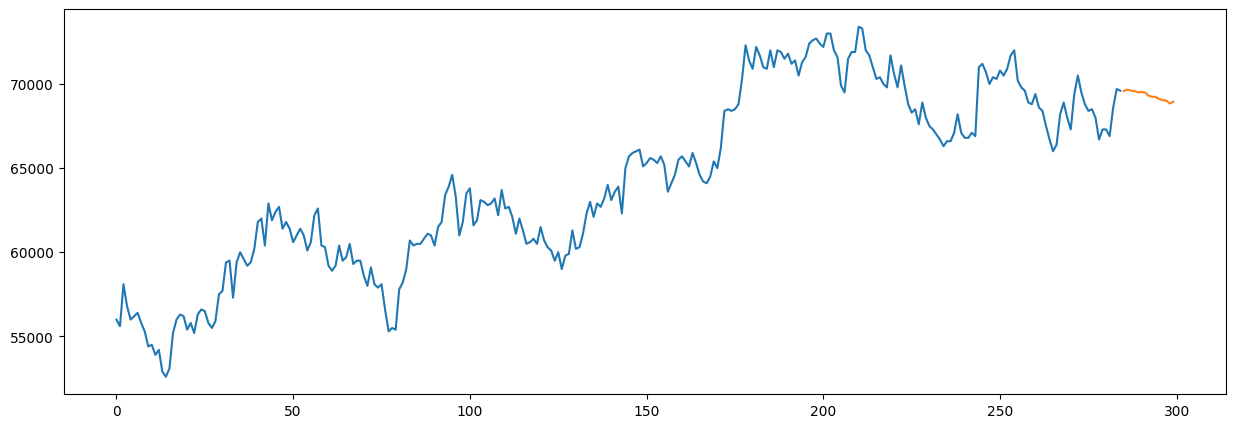

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train.values)
plt.plot(forecast_s)

In [ ]:
forecast_s
# test

285    69587.171348
286    69668.249046
287    69607.262306
288    69574.638662
289    69507.115409
290    69518.070210
291    69492.629763
292    69304.668917
293    69238.528800
294    69235.178278
295    69108.424819
296    69039.701712
297    69013.245764
298    68841.268802
299    68948.084822
Name: predicted_mean, dtype: float64

In [ ]:
def MAPEval(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = MAPEval(forecast_s.values, test.values)
mape

3.1342190954201627